In [396]:
import pandas as pd
import json
import os
import requests
from datetime import datetime, timezone
import matplotlib as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
import statsmodels.api as sms
from tensorflow.keras.layers import Dropout

In [397]:
!pip install pmdarima


In [398]:
url = "https://merolagani.com/handlers/TechnicalChartHandler.ashx?type=get_advanced_chart&symbol=NTC&resolution=1D&rangeStartDate=1642676807&rangeEndDate=1768820807&from=&isAdjust=1&currencyCode=NPR"
response = requests.get(url)
data = response.json()


with open("Ntc.json", "w") as f:
    json.dump(data, f)

In [399]:
companies = ["/content/Ntc.json"]

for symbol in companies:
    with open(f"{symbol}", 'r') as f:
        data = json.load(f)
        print(data)
    dates = [datetime.fromtimestamp(ts, tz=timezone.utc).strftime('%Y-%m-%d') for ts in data['t']]
    df=pd.DataFrame({
    "Date":dates,
    "Open":data['o'],
    "Close":data['c'],
    "High":data['h'],
    "Low":data['l'],
    "Volume":data['v']

})
    csv_filename = os.path.basename(symbol).replace('.json', '.csv')
    print(csv_filename)
    df.to_csv(csv_filename,index=False)
    print(f"{csv_filename}created")

{'t': [1642711500, 1642970700, 1643057100, 1643143500, 1643229900, 1643316300, 1643575500, 1643661900, 1643748300, 1643921100, 1644180300, 1644266700, 1644353100, 1644439500, 1644525900, 1644785100, 1644871500, 1644957900, 1645044300, 1645130700, 1645389900, 1645476300, 1645562700, 1645649100, 1645735500, 1645994700, 1646081100, 1646253900, 1646599500, 1646685900, 1646858700, 1646945100, 1647204300, 1647290700, 1647377100, 1647463500, 1647809100, 1647895500, 1647981900, 1648068300, 1648154700, 1648413900, 1648500300, 1648586700, 1648673100, 1648759500, 1649018700, 1649105100, 1649191500, 1649277900, 1649364300, 1649709900, 1649796300, 1649882700, 1650228300, 1650314700, 1650401100, 1650487500, 1650573900, 1650833100, 1650919500, 1651005900, 1651092300, 1651178700, 1651524300, 1651697100, 1651783500, 1652042700, 1652129100, 1652215500, 1652301900, 1652388300, 1652820300, 1652906700, 1652993100, 1653079500, 1653338700, 1653425100, 1653511500, 1653597900, 1653684300, 1653943500, 165402990

In [400]:
df = pd.read_csv("Ntc.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
print(len(df))

925


In [401]:
df.head()

,Open,Close,High,Low,Volume
Date,,,,,
2022-01-20,1196.67,1214.17,1253.58,1193.33,107068.0
2022-01-23,1238.33,1260.83,1270.83,1225.00,213430.0
2022-01-24,1258.33,1213.33,1258.33,1197.50,132662.0
2022-01-25,1191.67,1207.42,1237.50,1189.08,49872.0
2022-01-26,1207.50,1200.00,1215.83,1188.33,38238.0


In [402]:
df.tail()

,Open,Close,High,Low,Volume
Date,,,,,
2026-01-08,858.0,858.0,860.0,850.0,9482.0
2026-01-12,857.0,851.4,863.0,850.0,16784.0
2026-01-13,853.0,846.0,858.0,845.5,10718.0
2026-01-14,846.0,847.0,850.0,845.1,10928.0
2026-01-18,858.0,852.0,858.0,845.0,11299.0


In [403]:
type(df)

pandas.core.frame.DataFrame

In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 925 entries, 2022-01-20 to 2026-01-18
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    925 non-null    float64
 1   Close   925 non-null    float64
 2   High    925 non-null    float64
 3   Low     925 non-null    float64
 4   Volume  925 non-null    float64
dtypes: float64(5)
memory usage: 43.4 KB


<Axes: xlabel='Date'>

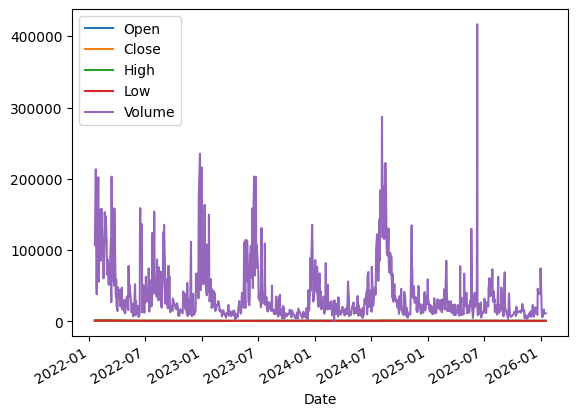

In [405]:
df.plot()

In [406]:
def plot_graph(figsize, df_to_plot, column_name):

    plt.figure(figsize=figsize)
    plt.plot(df_to_plot.index, df_to_plot[column_name], label=column_name)
    plt.title(f"NTC {column_name} Over Time")
    plt.xlabel("Date")
    plt.ylabel(column_name)
    plt.legend()
    plt.show()

In [407]:
type(df['Close'])

pandas.core.series.Series

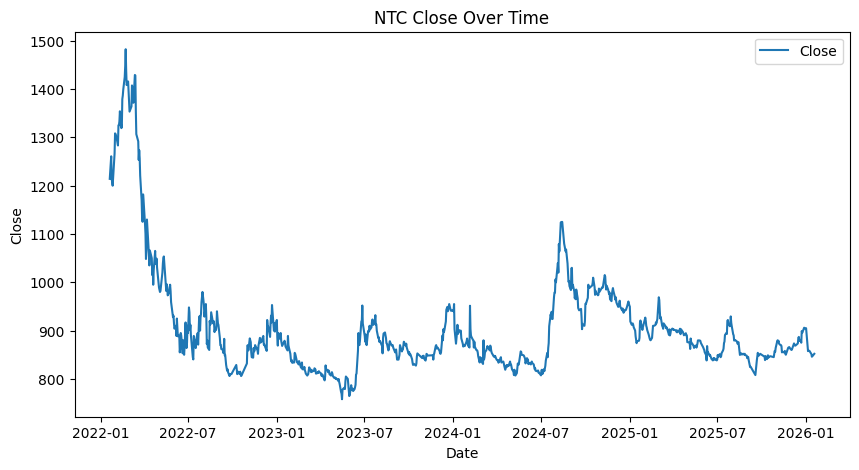

In [408]:
import matplotlib.pyplot as plt
plot_graph((10, 5), df, "Close")


#DICKEY FULLER TEST

In [409]:
from statsmodels.tsa.stattools import adfuller

In [410]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print('The series is stationary.')
    else:
        print('The series is not stationary.')

In [411]:
adf_test(df['Close'])

ADF Statistic: -2.958888705692161
p-value: 0.0389161497834368
The series is stationary.


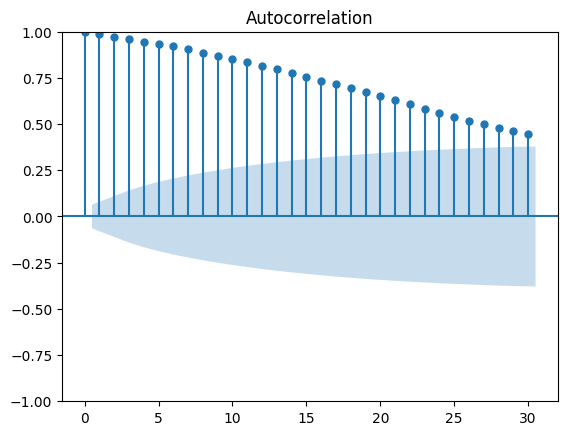

In [412]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(df['Close'])

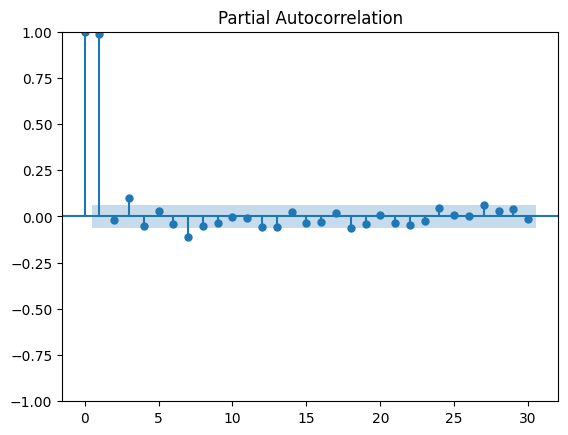

In [413]:
pacf = plot_pacf(df['Close'])

In [414]:
#using differencing
df['Close_first_difference'] = df['Close']-df['Close'].shift(1)

In [415]:
df.head()

,Open,Close,High,Low,Volume,Close_first_difference
Date,,,,,,
2022-01-20,1196.67,1214.17,1253.58,1193.33,107068.0,NaN
2022-01-23,1238.33,1260.83,1270.83,1225.00,213430.0,46.66
2022-01-24,1258.33,1213.33,1258.33,1197.50,132662.0,-47.50
2022-01-25,1191.67,1207.42,1237.50,1189.08,49872.0,-5.91
2022-01-26,1207.50,1200.00,1215.83,1188.33,38238.0,-7.42


In [416]:
data=df['Close_first_difference'].dropna()
adf_test(data)

ADF Statistic: -17.750239834582406
p-value: 3.372484001016224e-30
The series is stationary.


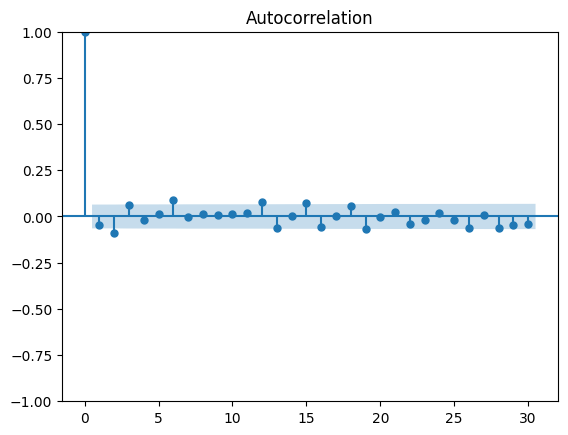

In [417]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(data)

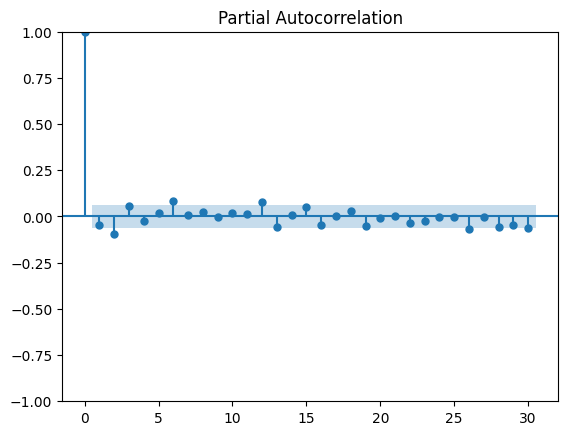

In [418]:
result = plot_pacf(data)

In [419]:
to_row=int(len(df)*0.8)
training_data = list(df['Close'].iloc[0:to_row])
testing_data  = list(df['Close'].iloc[to_row:])


In [420]:
testing_data

[891.24,
 902.53,
 889.97,
 893.51,
 900.47,
 904.29,
 901.7,
 902.39,
 901.57,
 900.35,
 896.64,
 900.34,
 896.73,
 899.84,
 903.95,
 892.68,
 902.74,
 898.67,
 896.99,
 893.38,
 890.39,
 891.37,
 894.57,
 890.01,
 890.05,
 876.13,
 875.81,
 873.71,
 862.04,
 883.69,
 876.14,
 871.84,
 868.18,
 864.23,
 868.19,
 869.09,
 869.09,
 864.85,
 869.4,
 873.04,
 879.77,
 879.71,
 879.45,
 878.94,
 874.75,
 865.14,
 862.32,
 860.4,
 855.37,
 849.24,
 838.29,
 867.97,
 853.97,
 854.96,
 848.46,
 849.96,
 847.09,
 844.6,
 841.64,
 838.36,
 842.62,
 840.52,
 843.11,
 839.88,
 840.48,
 838.34,
 840.13,
 849.64,
 846.03,
 851.24,
 848.77,
 845.03,
 846.55,
 853.3,
 858.96,
 862.55,
 874.18,
 877.27,
 890.89,
 895.16,
 893.08,
 919.94,
 922.0,
 915.0,
 909.17,
 909.64,
 929.41,
 916.16,
 909.61,
 892.57,
 890.26,
 879.54,
 880.16,
 880.49,
 877.37,
 872.99,
 874.58,
 876.08,
 849.61,
 851.52,
 852.81,
 852.79,
 850.4,
 852.12,
 850.91,
 850.34,
 852.06,
 849.32,
 848.27,
 843.03,
 844.1,
 845.66,
 

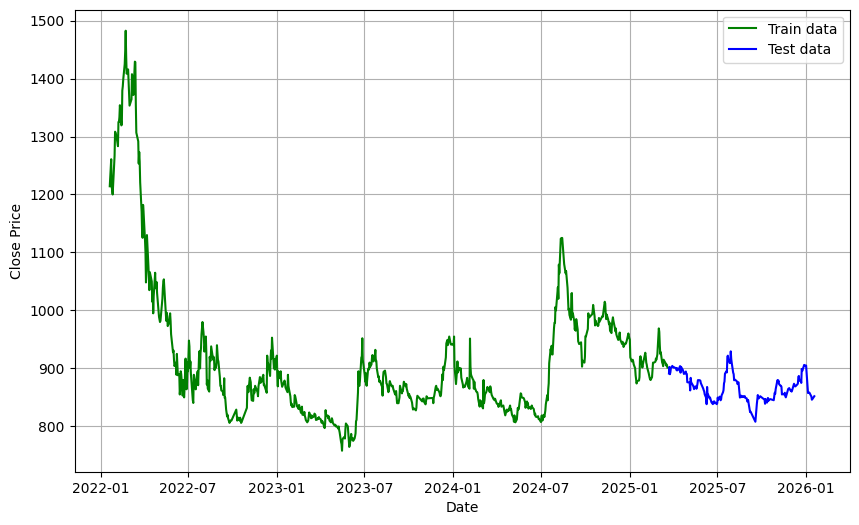

In [421]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(df[0:to_row]['Close'],'green',label='Train data')
plt.plot(df[to_row:]['Close'],'blue',label='Test data')
plt.legend()
plt.show()

In [422]:
model_predictions=[]
n_test_obser = len(testing_data)

In [423]:
from statsmodels.tsa.arima.model import ARIMA
model_predictions = []
n_test_obser = len(testing_data)

for i in range(n_test_obser):
    model = ARIMA(training_data, order=(1,0,0))
    model_fit = model.fit()

    output = model_fit.forecast(steps=5)
    yhat = output[0]

    model_predictions.append(yhat)
    training_data.append(testing_data[i])



In [424]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  924
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3895.976
Date:                Tue, 20 Jan 2026   AIC                           7797.951
Time:                        15:30:59   BIC                           7812.437
Sample:                             0   HQIC                          7803.478
                                - 924                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        906.7975     63.407     14.301      0.000     782.522    1031.073
ar.L1          0.9920      0.003    320.369      0.000       0.986       0.998
sigma2       267.8707      7.373     36.329      0.0

In [425]:
print(type(model_predictions))
print(np.array(model_predictions).shape)
print(model_predictions)


<class 'list'>
(185,)
[np.float64(901.4925757782983), np.float64(891.4454606274646), np.float64(902.6426633905146), np.float64(890.1855867821403), np.float64(893.6962788217226), np.float64(900.5989197455986), np.float64(904.3873150445937), np.float64(901.8184528387574), np.float64(902.5025920586164), np.float64(901.6891449063341), np.float64(900.4789657738063), np.float64(896.7991745974267), np.float64(900.4686047534178), np.float64(896.887981307489), np.float64(899.9722607551539), np.float64(904.0483555509946), np.float64(892.8705669710569), np.float64(902.8479637286919), np.float64(898.81117447435), np.float64(897.144703587649), np.float64(893.5639713270754), np.float64(890.5980632859101), np.float64(891.56973517308), np.float64(894.7433179082805), np.float64(890.2202227384358), np.float64(890.2595504450733), np.float64(876.4537470010964), np.float64(876.1357555407335), np.float64(874.0521205044834), np.float64(862.4750958140136), np.float64(883.9495297970952), np.float64(876.4618265

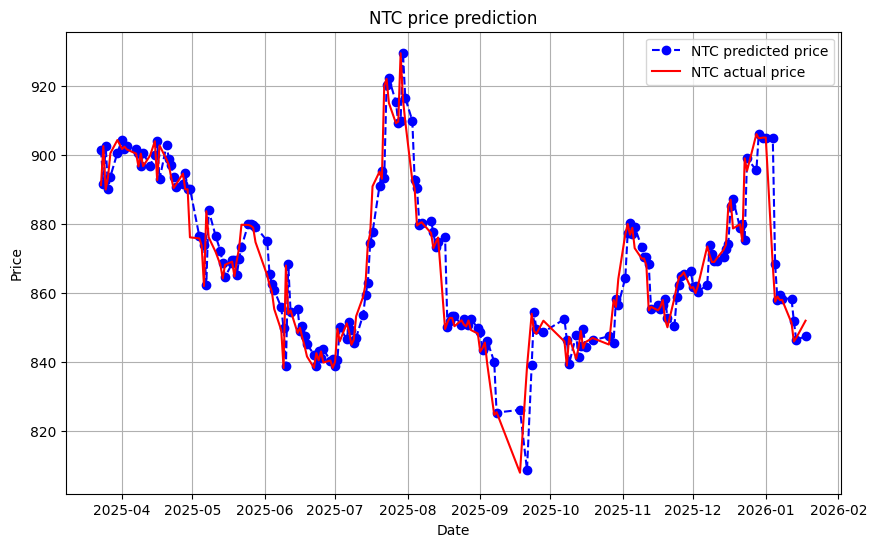

In [426]:
plt.figure(figsize=(10,6))
plt.grid(True)

date_range = df[to_row:].index
plt.plot(date_range, model_predictions, color='blue',marker='o',linestyle='dashed',label='NTC predicted price')
plt.plot(date_range, testing_data,color='red',label='NTC actual price')

plt.title('NTC price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [427]:
mape= np.mean(np.abs(np.array(model_predictions)-np.array(testing_data))/np.array(testing_data))
print('Mape:'+str(mape))

Mape:0.006104620663573613


In [428]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(testing_data, model_predictions))
print("RMSE:", rmse)


RMSE: 8.076704585465533


In [ ]:

import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import plotly.graph_objects as go


final_model = ARIMA(df['Close'], order=(1,0,0))
final_model_fit = final_model.fit()


forecast = final_model_fit.get_forecast(steps=5)
mean_forecast = forecast.predicted_mean
conf_int = forecast.conf_int()




future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=5, freq='D')


fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df.index,
    y=df['Close'],
    mode='lines',
    name='Historical'
))


fig.add_trace(go.Scatter(
    x=future_dates,
    y=mean_forecast.values,
    mode='lines+markers',
    name='Forecast',
    line=dict(color='red', dash='dash')
))


fig.add_trace(go.Scatter(
    x=list(future_dates) + list(future_dates[::-1]),
    y=list(conf_int.iloc[:,0]) + list(conf_int.iloc[:,1][::-1]),
    fill='toself',
    fillcolor='rgba(255,182,193,0.3)', 
    line=dict(color='rgba(255,182,193,0)'),
    hoverinfo="skip",
    showlegend=True,
    name='95% CI'
))

fig.update_layout(
    title='Stock Price Forecast with 95% Confidence Interval',
    xaxis_title='Date',
    yaxis_title='Close Price',
    template='plotly_white'
)

fig.show()


print("Next trading day prediction:", float(mean_forecast.iloc[0]))


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the 

Next trading day prediction: 852.4361017138203


In [430]:
print(forecast)


#AUTO_ARIMA

In [431]:
import pandas as pd
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Suppose df['Close'] has your stock prices
# Example: df = pd.read_csv("NTC.csv", parse_dates=['Date'], index_col='Date')

# --- Step 1: Use auto_arima to find best p,d,q ---
auto_model = pm.auto_arima(
    df['Close'],
    start_p=0, max_p=5,
    start_q=0, max_q=5,
    d=None,               # if None, automatically test for differencing
    seasonal=False,       # change to True if you suspect seasonality
    stepwise=True,        # faster search
    suppress_warnings=True,
    trace=True            # prints search progress
)

print("Best ARIMA order:", auto_model.order)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7793.069, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7793.047, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7792.615, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7791.598, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7792.736, Time=0.45 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.946 seconds
Best ARIMA order: (0, 1, 0)


In [432]:
import pickle
with open("arima_model_historical_ntc.pkl", "wb") as f:
    pickle.dump(final_model_fit, f)

print("Model saved as arima_model.pkl")


Model saved as arima_model.pkl
